# Tutorial #27: Debugging 

In this tutorial you will use the debugging skills from lecture to debug existing code. 

### Q1

Use debugging techniques to find what's wrong with the code below and fix it

In [2]:
import numpy as np

In [40]:
def calc_matrix_trace(A):
    '''
    Calculates the trace of a matrix by summing the diagonal elements of a square 2D matrix
    More on the trace of a matrix here https://en.wikipedia.org/wiki/Trace_(linear_algebra)#Definition

    Input:

    A: the matrix (2D array)

    Output:

    trace: the value of trace(A) (float)
    '''

    # Get the number of diagonal elements
    Nd = A.shape[0]
    # set the current trace to 0
    trace = 0

    # Iterate over the diagonal elements 
    # add them to the running sum
    for i in range(Nd):

        trace += A[i,i]

    return trace


mat = np.eye(2) # Numpy was not imported
print(mat)

[[1. 0.]
 [0. 1.]]


In [54]:
trace = calc_matrix_trace(mat)
# 1. We get an error here because the function tries to add to trace before trace is ever defined. We must define a trace variable before the for loop inside the function

# 2. The next error says index 2 is out of bounds of our matrix because we are iterating from 0 to the length of the matrix; the number of elements in the matrix. Since we start indexing at one we actually want to stop at (size of one axis - 1) since range already stops at the index before it's input, we just want the do range(size of one axis).

print(f"The matrix:\n{mat}\nhas a trace of: {trace}") #Made the output a bit more verbose for readibility

The matrix:
[[1. 0.]
 [0. 1.]]
has a trace of: 2.0


### Q2

In [56]:
import numpy as np
import matplotlib.pyplot as plt

Let's try to numerically calculate the derivative of 

$y(x) = x^2 - 1$

by finding $\frac{\Delta y}{\Delta x}$

Debug and fix the code below to properly calculate the approximate derivative and plot it alongside y(x)

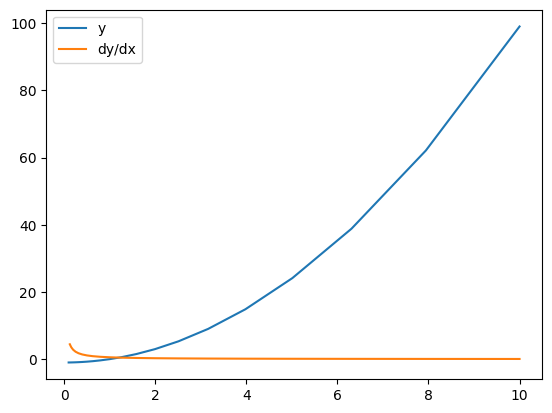

In [65]:
xs = np.logspace(-1, 1, 20+1)

ys = xs**2 - 1

delta_x = np.diff(xs)

delta_y = np.diff(ys)

dY_dX = delta_x / delta_y

plt.plot(xs, ys, label='y')

plt.plot(xs[1:], dY_dX, label='dy/dx')
# xs and DY_dx have different sizes 21 to 20
# adjust the size of xs to match the side of dY/dx (since there is only a dY/dX for each change in x, there will be one less data point.)

plt.legend()

### Q3

Create a test case for the function below. Try to keep it simple but still be able to catch most things that could go wrong in the function
    
- Make a test case
- Give the answer for your test case (from you, not from the function)
- Run your test case through the function
- If it needs it, debug until it works

In [74]:
def outer_product(u, v):
    '''
    Compute the outer product of 2, 1D vectors. 
    The definition of the outer product can be found here
    https://en.wikipedia.org/wiki/Outer_product#Definition
    A = u Transpose(v)

    Input:
    u: first vector in the outer product (1D array)
    v: second vector in the outer product (1D array)

    Returns:
    A: resulting 2D matrix from outer product (2D array)
    '''

    N0 = len(u)
    N1 = len(v) # Fixed len(u) to len(v)


    A = np.zeros((N0, N1))

    for i in range(N0):
        U = u[i]
        for j in range(N1):
            V = v[j]
            A[i,j] = U*V # Fixed add to multiply
    
    return A

In [76]:
# Test case 1: Matching sizes (3x3 matrix)
u1 = [1, 2, 3]
v1 = [4, 5, 6]
expected_A1 = np.array([[4, 5, 6],
                        [8, 10, 12],
                        [12, 15, 18]])
A1 = outer_product(u1, v1)
print("Test Case 1:")
print("Expected:\n", expected_A1)
print("Result:\n", A1) # First output did not work b.c the fucntion was adding instead of multiplying elements together.
print("Pass:", np.array_equal(A1, expected_A1))
print()

# Test case 2: Different sizes (3x2 matrix)
u2 = [1, 2, 3]
v2 = [4, 5]
expected_A2 = np.array([[4, 5],
                        [8, 10],
                        [12, 15]])
A2 = outer_product(u2, v2) # The function sets both dimensions of the matrix to the size of u restricting the functiont square matrices. 
print("Test Case 2:")
print("Expected:\n", expected_A2)
print("Result:\n", A2)
print("Pass:", np.array_equal(A2, expected_A2))
print()

# Test case 3: Different sizes (2x3 matrix)
u3 = [1, 2]
v3 = [3, 4, 5]
expected_A3 = np.array([[3, 4, 5],
                        [6, 8, 10]])
A3 = outer_product(u3, v3)
print("Test Case 3:")
print("Expected:\n", expected_A3)
print("Result:\n", A3)
print("Pass:", np.array_equal(A3, expected_A3))
print() # Passed first try

# Test case 4: One vector is empty
u4 = []
v4 = [1, 2, 3]
expected_A4 = np.array([]).reshape(0, 3)
A4 = outer_product(u4, v4)
print("Test Case 4:")
print("Expected:\n", expected_A4)
print("Result:\n", A4)
print("Pass:", np.array_equal(A4, expected_A4))
print() # Passed first try

# Test case 5: Both vectors are empty
u5 = []
v5 = []
expected_A5 = np.array([]).reshape(0, 0)
A5 = outer_product(u5, v5)
print("Test Case 5:")
print("Expected:\n", expected_A5)
print("Result:\n", A5)
print("Pass:", np.array_equal(A5, expected_A5))
 # Passed first try

Test Case 1:
Expected:
 [[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
Result:
 [[ 4.  5.  6.]
 [ 8. 10. 12.]
 [12. 15. 18.]]
Pass: True

Test Case 2:
Expected:
 [[ 4  5]
 [ 8 10]
 [12 15]]
Result:
 [[ 4.  5.]
 [ 8. 10.]
 [12. 15.]]
Pass: True

Test Case 3:
Expected:
 [[ 3  4  5]
 [ 6  8 10]]
Result:
 [[ 3.  4.  5.]
 [ 6.  8. 10.]]
Pass: True

Test Case 4:
Expected:
 []
Result:
 []
Pass: True

Test Case 5:
Expected:
 []
Result:
 []
Pass: True
